# MULTI-FACTOR MODEL
Name: Ha Doan, Ha Pham  
Course: INFO348 
Professor: 

In [163]:
# Adding data analytics libraries
import numpy as np
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns

In [164]:
stocks = pd.read_excel("Stocks.xlsx", sheet_name = None)
# Note in order for python to read excel file you must download "openpyxl" use "pip install openpyxl" in cmd

# Looking at the data
for x in stocks.values():
    print(x)

           Date   Adj Close  Earning
0    2018-12-13   41.019924        0
1    2018-12-14   39.707371        0
2    2018-12-17   39.337841        0
3    2018-12-18   39.848953        0
4    2018-12-19   38.605995        0
...         ...         ...      ...
1253 2023-12-06  192.320007        0
1254 2023-12-07  194.270004        0
1255 2023-12-08  195.710007        0
1256 2023-12-11  193.179993        0
1257 2023-12-12  194.710007        0

[1258 rows x 3 columns]
           Date   Adj Close  Earning
0    2018-12-13   82.918999        0
1    2018-12-14   79.595497        0
2    2018-12-17   76.045502        0
3    2018-12-18   77.573997        0
4    2018-12-19   74.753998        0
...         ...         ...      ...
1253 2023-12-06  144.520004        0
1254 2023-12-07  146.880005        0
1255 2023-12-08  147.419998        0
1256 2023-12-11  145.889999        0
1257 2023-12-12  147.479996        0

[1258 rows x 3 columns]
           Date   Adj Close  Earning
0    2018-12-13  212.0638

### Cleaning up data
The data given only have price, an universal dates (2018 - 2023) and it earning release dates as a dummy variables. In order to closely examinate the stock changes we need to further refine and calculate the neccessery variables

1. Using the name of the sheet (which is the stock ticker) as the name for the stock's price (denote as "Adj Close")    
2. Calculate the Returns, Variance, and Implied Volatility of each stock    
Where:  
return = $\frac{P_{t}}{P_{t-1}} - 1$   
variance = $(x - mean)^2$   
volatility = $\sqrt{var * 252}$ 

3. Merge data into one data frame for easier access

In [165]:
# 1. Clean up sheet: change name
def clean_up(ticker: str, df: pd.DataFrame) -> pd.DataFrame:
    df = df
    
    # fix date to int
    if df["Date"].dtype != int:
        df["Date"] = df["Date"].dt.strftime('%Y%m%d').astype(int)

    # Setting index to date
    df = df.set_index("Date")

    # Changing names
    df = df.rename({"Earning" : ticker + "_earning", "Adj Close": ticker + "_Price"}, axis = 1)
    return df

for ticker, df in stocks.items():
    stocks[ticker] = clean_up(ticker, df)

In [166]:
# View Data 
print(stocks.keys())
stocks["AAPL"]

dict_keys(['AAPL', 'AMZN', 'COST', 'JPM', 'BAC', 'CRM', 'CVX', 'KO', 'MA', 'NVDA', 'HAS', 'SEAS', 'JEF', 'W', 'WING', 'CROX', 'HXL', 'ALLY', 'UHS', 'HLNE'])


,AAPL_Price,AAPL_earning
Date,,
20181213,41.019924,0
20181214,39.707371,0
20181217,39.337841,0
20181218,39.848953,0
20181219,38.605995,0
...,...,...
20231206,192.320007,0
20231207,194.270004,0
20231208,195.710007,0


In [167]:
# 2. Calculate Returns, Variance, and Implied Volatility (by one year)

def add_values(ticker: str, df: pd.DataFrame) -> pd.DataFrame:
    # Getting Returns
    retrn = pd.Series.to_frame(df["{}_Price".format(ticker)].pct_change().sort_index(ascending=False), name = "{}_return".format(ticker))
    df = df.join(retrn)

    # Getting Variance
    mean = np.mean(df["{}_return".format(ticker)])
    var = pd.Series.to_frame(df["{}_return".format(ticker)].apply(lambda x: (x - mean)**2), name = "{}_var".format(ticker))
    df = df.join(var)

    # Getting Implied Volatility
    vol = pd.Series.to_frame(df["{}_var".format(ticker)].apply(lambda x: np.sqrt(x*252)), name = "{}_vol".format(ticker))
    df = df.join(vol)

    # Deleting first row and sort descending
    df = df.iloc[1:]
    df = df.sort_index(ascending=False)
    return df

# Testing
aapl = add_values("AAPL", stocks["AAPL"])
aapl

,AAPL_Price,AAPL_earning,AAPL_return,AAPL_var,AAPL_vol
Date,,,,,
20231212,194.710007,0,0.007920,0.000042,0.102714
20231211,193.179993,0,-0.012927,0.000207,0.228230
20231208,195.710007,0,0.007412,0.000036,0.094653
20231207,194.270004,0,0.010139,0.000076,0.137942
20231206,192.320007,0,-0.005687,0.000051,0.113294
...,...,...,...,...,...
20181220,37.631790,0,-0.025235,0.000712,0.423601
20181219,38.605995,0,-0.031192,0.001065,0.518168
20181218,39.848953,0,0.012993,0.000133,0.183241


In [168]:
# Applying to all data frame
for ticker, data in stocks.items():
    stocks[ticker] = add_values(ticker, data)

In [169]:
stocks["JPM"]

,JPM_Price,JPM_earning,JPM_return,JPM_var,JPM_vol
Date,,,,,
20231212,160.520004,0,0.008925,0.000068,0.130719
20231211,159.100006,0,0.003659,0.000009,0.047118
20231208,158.520004,0,0.011034,0.000107,0.164194
20231207,156.789993,0,0.003071,0.000006,0.037783
20231206,156.309998,0,-0.010508,0.000125,0.177779
...,...,...,...,...,...
20181220,82.877144,0,-0.008634,0.000087,0.148025
20181219,83.598938,0,-0.012685,0.000179,0.212330
20181218,84.673004,0,-0.004747,0.000030,0.086322


In [170]:
# 3. Merging all data frames
stocks_data = pd.concat([data for data in stocks.values()], axis=1)
stocks_data

,AAPL_Price,AAPL_earning,AAPL_return,AAPL_var,AAPL_vol,AMZN_Price,AMZN_earning,AMZN_return,AMZN_var,AMZN_vol,...,UHS_Price,UHS_earning,UHS_return,UHS_var,UHS_vol,HLNE_Price,HLNE_earning,HLNE_return,HLNE_var,HLNE_vol
Date,,,,,,,,,,,,,,,,,,,,,
20231212,194.710007,0,0.007920,0.000042,0.102714,147.479996,0,0.010899,0.000104,0.161720,...,144.929993,0,0.010528,0.000102,0.160701,104.615631,0,0.000667,3.280190e-07,0.009092
20231211,193.179993,0,-0.012927,0.000207,0.228230,145.889999,0,-0.010379,0.000123,0.176043,...,143.419998,0,0.043434,0.001851,0.683059,104.545921,0,0.012441,1.254721e-04,0.177817
20231208,195.710007,0,0.007412,0.000036,0.094653,147.419998,0,0.003676,0.000009,0.047072,...,137.449997,0,0.023074,0.000514,0.359855,103.261253,0,0.020772,3.815089e-04,0.310065
20231207,194.270004,0,0.010139,0.000076,0.137942,146.880005,0,0.016330,0.000244,0.247940,...,134.350006,0,-0.006434,0.000047,0.108569,101.159981,0,-0.004606,3.416505e-05,0.092788
20231206,192.320007,0,-0.005687,0.000051,0.113294,144.520004,0,-0.016068,0.000282,0.266354,...,135.220001,0,-0.006539,0.000048,0.110234,101.628036,0,0.024701,5.504578e-04,0.372445
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20181220,37.631790,0,-0.025235,0.000712,0.423601,73.041496,0,-0.022909,0.000558,0.374951,...,112.631302,0,-0.005945,0.000040,0.100809,31.108551,0,0.018722,3.056503e-04,0.277532
20181219,38.605995,0,-0.031192,0.001065,0.518168,74.753998,0,-0.036352,0.001374,0.588366,...,113.304909,0,-0.030409,0.000950,0.489166,30.536829,0,-0.016370,3.100781e-04,0.279535
20181218,39.848953,0,0.012993,0.000133,0.183241,77.573997,0,0.020100,0.000376,0.307784,...,116.858490,0,0.010212,0.000096,0.155674,31.045021,0,0.009144,6.248788e-05,0.125487


### Analysis: stocks vs their earning dates (Denote as Earning)
Assumption: at companies financial release, investors often have different opinions on of the stocks. Thus, change their position on the stock based on the information. Overtime, more and more people do that making the stock varies a lot during this time and creates a high volatility in these dates.

Let's have a closer look by:
1. Divided the data into 2 dataframe: large cap (first 10 stocks with valuation near or over 1 trilion dollars) and small cap (1 - 10 billion dollars)
2. Take one stock from each data frame and graph out the returns and variance between non and earning dates
3. Use statsmodels.api to apply a linear regression on these event to see if there is any significant relation betweent the stock and the event.
4. Calculate the the average volatility on these dates to see if there is any significant differences 
5. Conclusion, drawn from the observations of the above

In [171]:
# 1. Splitting the data into small and large cap stocks

# first 50 columns are the datas for the large cap stocks
large = stocks_data.iloc[:, :50]
# last 50 columns are the datas for small cap stocks
small = stocks_data.iloc[:, 50:]
small

,HAS_Price,HAS_earning,HAS_return,HAS_var,HAS_vol,SEAS_Price,SEAS_earning,SEAS_return,SEAS_var,SEAS_vol,...,UHS_Price,UHS_earning,UHS_return,UHS_var,UHS_vol,HLNE_Price,HLNE_earning,HLNE_return,HLNE_var,HLNE_vol
Date,,,,,,,,,,,,,,,,,,,,,
20231212,48.369999,0,-0.010636,1.127760e-04,0.168581,51.700001,0,-0.001930,0.000010,0.049185,...,144.929993,0,0.010528,0.000102,0.160701,104.615631,0,0.000667,3.280190e-07,0.009092
20231211,48.889999,0,0.003901,1.535004e-05,0.062195,51.799999,0,-0.000772,0.000004,0.030789,...,143.419998,0,0.043434,0.001851,0.683059,104.545921,0,0.012441,1.254721e-04,0.177817
20231208,48.700001,0,-0.000205,3.562222e-08,0.002996,51.840000,0,0.030821,0.000879,0.470732,...,137.449997,0,0.023074,0.000514,0.359855,103.261253,0,0.020772,3.815089e-04,0.310065
20231207,48.709999,0,0.017973,3.236175e-04,0.285572,50.290001,0,0.012482,0.000128,0.179613,...,134.350006,0,-0.006434,0.000047,0.108569,101.159981,0,-0.004606,3.416505e-05,0.092788
20231206,47.849998,0,-0.002502,6.175766e-06,0.039450,49.669998,0,0.016786,0.000244,0.247931,...,135.220001,0,-0.006539,0.000048,0.110234,101.628036,0,0.024701,5.504578e-04,0.372445
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20181220,66.520897,0,-0.017515,3.062074e-04,0.277785,23.450001,0,-0.037751,0.001515,0.617823,...,112.631302,0,-0.005945,0.000040,0.100809,31.108551,0,0.018722,3.056503e-04,0.277532
20181219,67.706802,0,-0.021871,4.776311e-04,0.346934,24.370001,0,-0.091011,0.008497,1.463290,...,113.304909,0,-0.030409,0.000950,0.489166,30.536829,0,-0.016370,3.100781e-04,0.279535
20181218,69.220749,0,-0.015432,2.376416e-04,0.244716,26.809999,0,-0.040787,0.001760,0.666016,...,116.858490,0,0.010212,0.000096,0.155674,31.045021,0,0.009144,6.248788e-05,0.125487


(-0.1, 0.1)

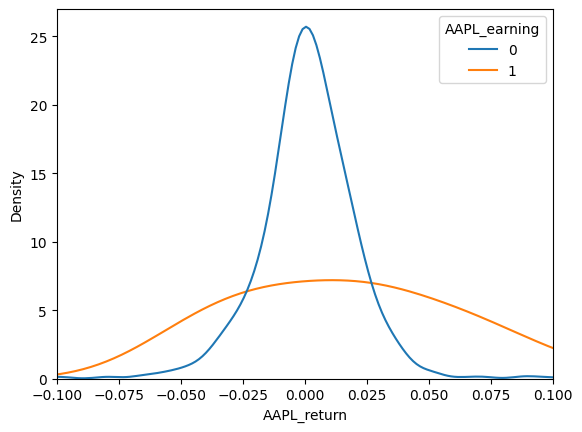

In [172]:
# 2. Graph out the return and volatility of one stock from each data frame while comparing the difference with and without earning event

# Large cap: AAPL (Apple Inc)

# Return distribution
g = sns.kdeplot(data = large, x = "AAPL_return", hue = "AAPL_earning", common_norm = False)
plt.xlim(-0.1, 0.1)

(0.0, 1.5)

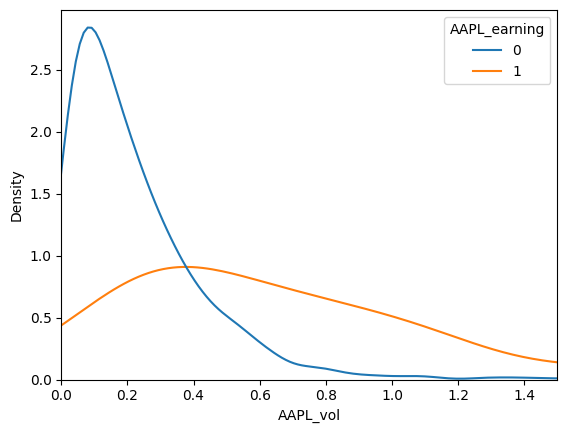

In [209]:
# Apple Volatility distribution
g1 = sns.kdeplot(data = large, x = "AAPL_vol", hue = "AAPL_earning", common_norm = False)
plt.xlim(0.0, 1.5)

(-0.1, 0.1)

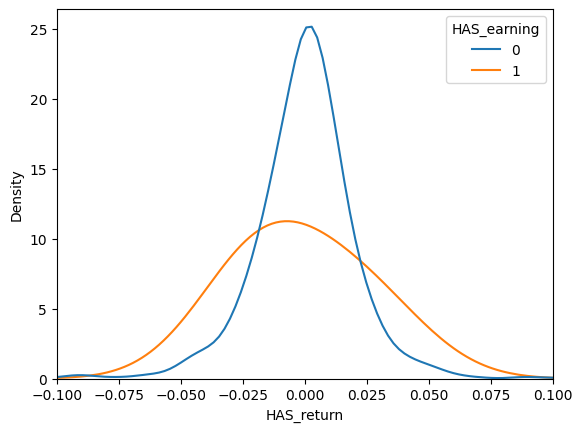

In [206]:
# Small cap: HAS (Hasbro Corp)

# Return distribution
g2 = sns.kdeplot(data = small, x = "HAS_return", hue = "HAS_earning", common_norm = False)
plt.xlim(-0.1, 0.1)

(0.0, 1.5)

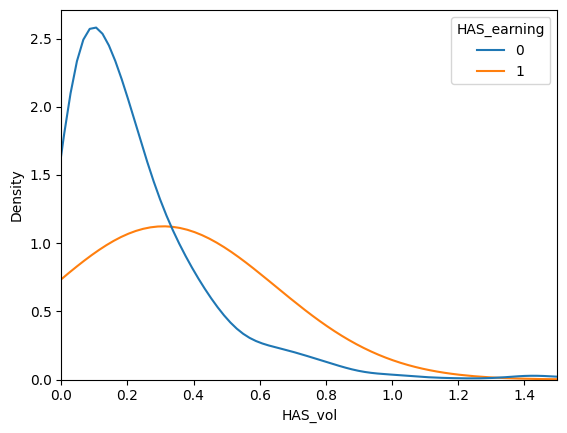

In [208]:
# Valatility distribution
g3 = sns.kdeplot(data = small, x = "HAS_vol", hue = "HAS_earning", common_norm = False)
plt.xlim(0.0, 1.5)

In here we can observe that there is an INCREASE in variance on the earning dates such that the orange curve (which is when the companies' earnings are release) impose a huge variance which indicates a much lower concentration at mean but rather spread out in the tail! But would there any relation between the stock and the earning release? Let's try a simple linear regression on all stocks to see if there is any significant different.

In [187]:
# 3. use regression on all stocks start with large cap

# Large cap-earning relation
regress_large = pd.DataFrame(columns=['Stock', 'T-Statistic', 'P-Value'])
large_cap = list(stocks.keys())[:10]

for stock in large_cap:
    x = sm.add_constant(large["{}_earning".format(stock)])
    y = large["{}_vol".format(stock)]

    model = sm.OLS(y, x).fit()

    # Extract t-statistic and p-value
    t_statistic = model.tvalues[1]
    p_value = model.pvalues[1]

    # Append results to the results DataFrame
    regress_large = regress_large.append({'Stock': stock, 'T-Statistic': t_statistic, 'P-Value': p_value}, ignore_index=True)

regress_large['Significant'] = regress_large['P-Value'].abs() < 0.05

regress_large

C:\Users\Ha Doan\AppData\Local\Temp\ipykernel_36116\1315344546.py:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  regress_large = regress_large.append({'Stock': stock, 'T-Statistic': t_statistic, 'P-Value': p_value}, ignore_index=True)
C:\Users\Ha Doan\AppData\Local\Temp\ipykernel_36116\1315344546.py:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  regress_large = regress_large.append({'Stock': stock, 'T-Statistic': t_statistic, 'P-Value': p_value}, ignore_index=True)
C:\Users\Ha Doan\AppData\Local\Temp\ipykernel_36116\1315344546.py:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  regress_large = regress_large.append({'Stock': stock, 'T-Statistic': t_statistic, 'P-Value': p_value}, ignore_index=True)
C:\Users\Ha Doan\Ap

,Stock,T-Statistic,P-Value,Significant
0,AAPL,7.470743,1.488742e-13,True
1,AMZN,13.284285,8.908639e-38,True
2,COST,1.853583,6.403343e-02,False
3,JPM,-0.694990,4.871900e-01,False
4,BAC,-0.776703,4.374806e-01,False
5,CRM,4.106570,4.275586e-05,True
6,CVX,-0.670132,5.028972e-01,False
7,KO,0.565683,5.717107e-01,False
8,MA,2.809441,5.039778e-03,True
9,NVDA,-0.391217,6.957035e-01,False


In [188]:
# Small Cap earning relation
regress_small = pd.DataFrame(columns=['Stock', 'T-Statistic', 'P-Value'])
small_cap = list(stocks.keys())[10:]

for stock in small_cap:
    x = sm.add_constant(small["{}_earning".format(stock)])
    y = small["{}_vol".format(stock)]

    model = sm.OLS(y, x).fit()

    # Extract t-statistic and p-value
    t_statistic = model.tvalues[1]
    p_value = model.pvalues[1]

    # Append results to the results DataFrame
    regress_small = regress_small.append({'Stock': stock, 'T-Statistic': t_statistic, 'P-Value': p_value}, ignore_index=True)

regress_small['Significant'] = regress_small['P-Value'].abs() < 0.05

regress_small

C:\Users\Ha Doan\AppData\Local\Temp\ipykernel_36116\2295829037.py:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  regress_small = regress_small.append({'Stock': stock, 'T-Statistic': t_statistic, 'P-Value': p_value}, ignore_index=True)
C:\Users\Ha Doan\AppData\Local\Temp\ipykernel_36116\2295829037.py:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  regress_small = regress_small.append({'Stock': stock, 'T-Statistic': t_statistic, 'P-Value': p_value}, ignore_index=True)
C:\Users\Ha Doan\AppData\Local\Temp\ipykernel_36116\2295829037.py:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  regress_small = regress_small.append({'Stock': stock, 'T-Statistic': t_statistic, 'P-Value': p_value}, ignore_index=True)
C:\Users\Ha Doan\Ap

,Stock,T-Statistic,P-Value,Significant
0,HAS,2.977765,2.959303e-03,True
1,SEAS,1.449190,1.475345e-01,False
2,JEF,0.956553,3.389769e-01,False
3,W,7.010274,3.874479e-12,True
4,WING,9.326124,4.795587e-20,True
5,CROX,11.969374,2.430163e-31,True
6,HXL,-1.101092,2.710677e-01,False
7,ALLY,0.138332,8.900003e-01,False
8,UHS,-1.338038,1.811265e-01,False
9,HLNE,-1.178793,2.387042e-01,False


In [191]:
print("Average difference in p-value (small - large): ", np.mean(regress_large["P-Value"]) - np.mean(regress_small["P-Value"]))

Average difference in p-value (small - large):  0.0693728412668386


As we can see that there is higher correlation for the small stocks than the large stocks with their earning dates! which means that at the earning dates there might be a higher fluction in stock price! But should there any better representation of this? Lets try to calculate the average volatility difference between even and non-event for small and large cap stock to see if there is any significant different!

Note, Volatility over time formula is:

$Vol = \sqrt{\frac{\sum \limits_{j = 1}^{n}{(r_{j} - \bar{r})^2}}{n-1} * 252} = \sqrt{\frac{\sum \limits_{j = 1}^{n}{var}}{n - 1} * 252}$

In [201]:
# 4. Volatility difference between event and non-event

# large cap
lst = {}
for stock in large_cap:
    series = large[large[stock + "_earning"] == 1][stock + "_var"]
    diff = np.sqrt(np.sum(series) / (len(series) - 1) * 252) - np.sqrt(np.sum(large[stock + "_var"]) / (len(large[stock + "_var"]) - 1) * 252)
    lst[stock] = diff

print("Average Implied Volatility different between event and non-event days of a Large-Cap stock: ", np.mean(list(lst.values())))


Average Implied Volatility different between event and non-event days of a Large-Cap stock:  0.15188780464744353


In [202]:
# small cap
lst = {}
for stock in small_cap:
    series = small[small[stock + "_earning"] == 1][stock + "_var"]
    diff = np.sqrt(np.sum(series) / (len(series) - 1) * 252) - np.sqrt(np.sum(small[stock + "_var"]) / (len(small[stock + "_var"]) - 1) * 252)
    lst[stock] = diff

print("Average Implied Volatility different between event and non-event days of a Large-Cap stock: ", np.mean(list(lst.values())))

Average Implied Volatility different between event and non-event days of a Large-Cap stock:  0.3381926370236281


### Conclusion
1. In this research, we experimented with stock volatility level at the earning release dates of the company.
2. There is a clear relation between these two variables which could be shown through the distribution of the model as well as a simple linear regression for each stock annualized volatility and the dummy variable of its earning release dates.
3. However, companies that within the financial market are usually not effected by this particular factor. One hypothesis is that they usually hedge against market risk and this factor is already incorporated into their model.
4. Small-cap stocks are much more volatile than large-cap stocks which can be seen that their annualized volatility difference between even and non-event are nearly double comparing to large-cap stocks.
